In [3]:
import tensorflow as tf
#from tensorflow import keras
#import numpy as np
#import matplotlib.pyplot as plt


In [4]:
from tensorflow import keras

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)


In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 36s 38ms/step - loss: 0.1791 - accuracy: 0.9467
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0597 - accuracy: 0.9823
Epoch 3/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0397 - accuracy: 0.9884
Epoch 4/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 5/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0209 - accuracy: 0.9932


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 3s 8ms/step - loss: 0.0441 - accuracy: 0.9852
Test accuracy: 0.9851999878883362


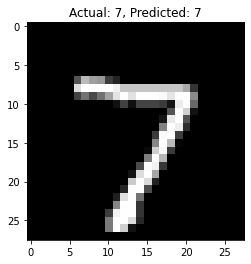

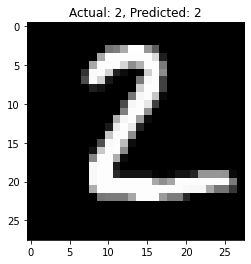

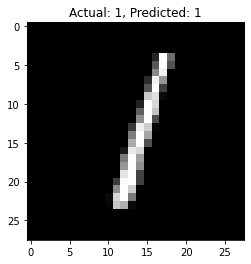

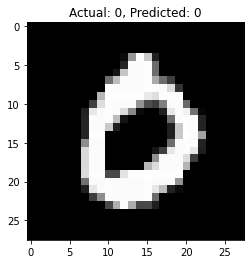

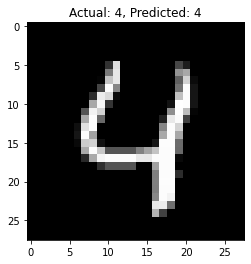

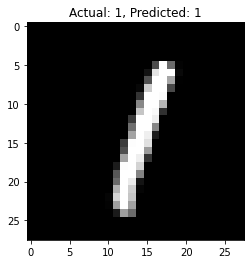

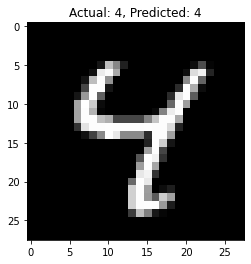

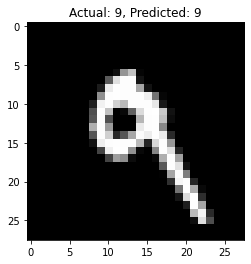

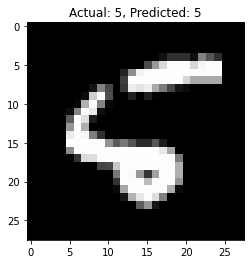

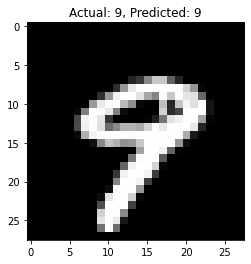

In [12]:
predictions = model.predict(test_images)

# Visualize some predictions
for i in range(10):
    plt.figure()
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {np.argmax(test_labels[i])}, Predicted: {np.argmax(predictions[i])}')
